### Importing Needed packages

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

<h2 id="reading_data">Reading the data in</h2>

In [52]:
df = pd.read_csv("challenge_data.csv")

# take a look at the dataset
df.head()

,index,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0,0.693931,0.634769,-0.751780,-1.586810,0.421293,0.599140,-0.180750,0.059869,0.975170,0.680625,-123.717679
1,1,-0.503215,0.973448,0.123033,1.344061,1.094889,0.506495,-0.680246,0.119860,0.391153,1.371086,266.033379
2,2,0.071483,0.098679,-0.004386,-1.586163,-0.643910,-0.669362,2.021002,-0.681658,-2.124477,0.160637,-179.081079
3,3,-0.164016,-0.900369,-0.043065,-0.514386,0.302797,1.566014,0.563370,-0.058207,1.022308,0.672829,7.546750
4,4,-1.689354,-2.055297,-1.465223,0.882966,-0.195914,-1.350270,0.047570,-0.948739,-0.631810,-1.357097,-177.720899


In [53]:
df = df.drop(columns="index")


In [60]:
df.columns


Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'target'],
      dtype='object')

In [62]:
x_df=df[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']]
x_df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10'],
      dtype='object')

# Plot to see relationship of feature with Target

In [55]:
import seaborn as sns

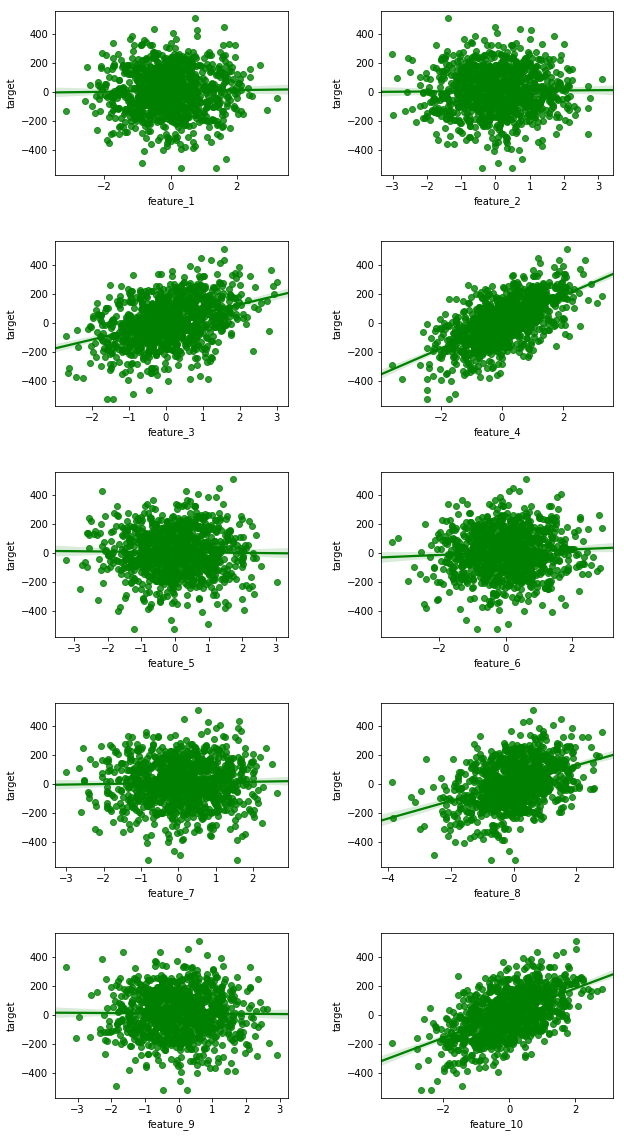

In [67]:
fig = plt.figure(figsize=(10,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for index,col in enumerate(x_df.columns):
    ax = fig.add_subplot(5, 2, index+1)
    ax = sns.regplot(x=col,y='target',data=df,color='green',ax=ax)

In [80]:
X=x_df.values
print(X[0:5])
y=df['target'].values
print(y[0:5])

[[-0.75178024 -1.5868101   0.05986877  0.68062453]
 [ 0.1230332   1.34406103  0.11985958  1.37108647]
 [-0.00438552 -1.58616299 -0.68165753  0.16063744]
 [-0.04306463 -0.51438568 -0.05820706  0.67282884]
 [-1.46522309  0.88296625 -0.94873872 -1.35709739]]
[-123.71767888  266.03337852 -179.08107906    7.54674952 -177.72089899]


In [81]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.83524028, -1.53834601,  0.03543725,  0.71883296],
       [ 0.07305822,  1.24258335,  0.09587146,  1.42468936],
       [-0.05923768, -1.53773201, -0.71156977,  0.1872523 ],
       [-0.0993973 , -0.52078624, -0.08351129,  0.71086346],
       [-1.57599143,  0.80507792, -0.98062498, -1.36432178]])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 4) (800,)
Test set: (200, 4) (200,)


In [83]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [52.24608795 99.59869294 66.62574884 86.88626361]


In [85]:
y_hat= regr.predict(X_test)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 0.01
Variance score: 1.00
